In [3]:
#Parte I: Familiarizandonos con la base EPH y limpieza

In [5]:
# Primero importamos las librerías que vamos a usar

import pandas as pd
import numpy as np

In [7]:
pip install --upgrade pandas xlrd openpyxl pyreadstat

In [9]:
# Cargo los archivos de las bases de datos con la ruta completa

# base del 2004 que está en formato .dta (de Stata)
df_2004 = pd.read_stata(r"C:\Users\Gustavo\Documents\GitHub\BigDataUBA-Grupo26\TP 2\EPH\Individual_t104.dta")

# base del 2024 que está en Excel
df_2024 = pd.read_excel(r"C:\Users\Gustavo\Documents\GitHub\BigDataUBA-Grupo26\TP 2\EPH\usu_individual_T124.xlsx")

In [9]:
df_2004.columns = df_2004.columns.str.lower()
df_2024.columns = df_2024.columns.str.lower()

In [11]:
# Me aseguro de que ambas bases tengan la columna 'ano4' con el año correcto

df_2004["ano4"] = 2004
df_2024["ano4"] = 2024

In [13]:
df = pd.concat([df_2004, df_2024], ignore_index=True)

In [15]:
print(df["ano4"].value_counts())

ano4
2024    46050
2004    45289
Name: count, dtype: int64


In [17]:
# Veo qué columnas tienen cada base para identificar cómo se llama "AGLOMERADO"
print("Columnas de la base 2004:")
print(df_2004.columns.tolist())

print("\nColumnas de la base 2024:")
print(df_2024.columns.tolist())

Columnas de la base 2004:
['codusu', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08

In [49]:
# Filtro por la región de Mar del Plata

# Según la variable AGLOMERADO, el código 34 corresponde a Mar del Plata
# Me quedo solo con las personas de esa región

df_2004 = df_2004[df_2004["aglomerado"] == 39599].copy()
df_2024 = df_2024[df_2024["aglomerado"] == 34].copy()

In [51]:
# Le agrego una columna para saber de qué año es cada fila

df_2004["ano4"] = 2004
df_2024["ano4"] = 2024


In [53]:
# Junto las dos bases en una sola (como si pegara hojas de Excel una abajo de la otra)

df = pd.concat([df_2004, df_2024], ignore_index=True)


C:\Users\Gustavo\AppData\Local\Temp\ipykernel_25012\3237440424.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_2004, df_2024], ignore_index=True)


In [55]:
print("Columnas vacías en df_2004:")
print(df_2004.isna().all())

print("\nColumnas vacías en df_2024:")
print(df_2024.isna().all())

Columnas vacías en df_2004:
codusu        True
nro_hogar     True
componente    True
h15           True
ano4          True
              ... 
adeccfr       True
pj1_1         True
pj2_1         True
pj3_1         True
idimpp        True
Length: 176, dtype: bool

Columnas vacías en df_2024:
codusu        False
ano4          False
trimestre     False
nro_hogar     False
componente    False
              ...  
rdeccfr       False
gdeccfr       False
pdeccfr        True
adeccfr       False
pondih        False
Length: 177, dtype: bool


In [57]:
print("\nColumnas en df_2004:")
print(set(df_2004.columns))

print("\nColumnas en df_2024:")
print(set(df_2024.columns))


Columnas en df_2004:
{'v18_m', 'pp07g1', 'pondera', 'pp05c_2', 'ch14', 'v11_m', 'ch10', 'ch11', 'pj3_1', 'pp07j', 'pp10c', 'v4_m', 'pp04b3_mes', 'pp10e', 'pp08f2', 'pp04b1', 'v19_am', 'pp08f1', 'gdeccfr', 'pp09b', 'pp11g_ano', 'pp02i', 'pp07a', 'pp07f4', 'pp3f_tot', 'pdecifr', 'ch03', 'pp11b_cod', 'tot_p12', 'rdecifr', 'idimpp', 'pp05e', 'gdecindr', 'pj2_1', 'deccfr', 'adeccfr', 'pp02c8', 'gdecocur', 'h15', 'pp04b2', 'pp05c_1', 'pp11n', 'pj1_1', 'pp11q', 'pp11a', 'pp02c6', 'pp07h', 'v12_m', 'ch15', 'pp02c7', 'pp02c5', 'pp10a', 'pp11b2_mes', 'intensi', 'aglomerado', 'pp05c_3', 'pp08j2', 'pp02h', 'adecifr', 'pp07g3', 'adecocur', 'ch13', 'pp10d', 'pp11p', 'idecindr', 'pp02e', 'pp07f5', 'pdecindr', 'pp05h', 'pp11t', 'pp04d_cod', 'pp04c', 'estado', 'componente', 'pp07f1', 'pp06c', 'adecindr', 'pp03j', 'pp11g_dia', 'pp03d', 'pp07f2', 'ch06', 'pp07i', 'pp11g_mes', 'itf', 'pp09a_esp', 'pp03h', 'decocur', 'pp02c3', 'v2_m', 'pp06a', 'ch12', 'pp07d', 'pp11o', 'rdecocur', 'pp09a', 'pp11l', 'regio

In [59]:
# Eliminar columnas totalmente vacías
df_2004_clean = df_2004.dropna(axis=1, how='all')
df_2024_clean = df_2024.dropna(axis=1, how='all')

# Luego concatenás
df = pd.concat([df_2004_clean, df_2024_clean], ignore_index=True)

In [61]:
# Elijo 15 variables que me interesan para el análisis
# Estas variables tienen info sobre edad, sexo, actividad laboral, educación e ingresos
# (los cuales están desarrolladas los pdf de diseño de registro y estructura)

vars_interes = [
    "CH04",        # Sexo
    "CH06",        # Edad
    "CH10",        # Si asiste o asistió a un establecimiento educativo
    "CH12",        # Nivel educativo alcanzado
    "ESTADO",      # Condición de actividad (ocupado, desocupado, etc.)
    "CAT_OCUP",    # Tipo de ocupación (si trabaja)
    "CAT_INAC",    # Tipo de inactividad (si no trabaja)
    "PP3E_TOT",    # Horas trabajadas en su ocupación principal
    "PP3F_TOT",    # Horas trabajadas en otras ocupaciones
    "PP03G",       # Si quiere trabajar más horas
    "PONDERA",     # Factor de expansión (cuánto representa esa persona)
    "NIVEL_ED",    # Nivel educativo resumido
    "IPCF",        # Ingreso per cápita familiar
    "ITF",         # Ingreso total del hogar
    "REGION"       # Región (por si se necesita más adelante)
]

In [63]:
# Me quedo solo con las columnas que me interesan
vars_interes = [col.lower() for col in vars_interes]
df = df[vars_interes + ["ano4"]]

In [67]:
#Parte II: Primer Análisis Exploratorio

In [97]:
import pandas as pd
# Cargar los archivos de 2004 (Stata) y 2024 (Excel)
data_2004 = pd.read_stata(r'C:\Users\Gustavo\Documents\GitHub\BigDataUBA-Grupo26\TP 2\EPH\Individual_t104.dta')
data_2024 = pd.read_excel(r'C:\Users\Gustavo\Documents\GitHub\BigDataUBA-Grupo26\TP 2\EPH\usu_individual_T124.xlsx')
# Verificar las primeras filas de los datos
print(data_2004.head())
print(data_2024.head())

     CODUSU  nro_hogar componente h15    ano4       trimestre  \
0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
4  125558          1.0        2.0  Sí  2004.0  1er. Trimestre   

              region mas_500              aglomerado  pondera  ... deccfr  \
0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07   
1  Gran Buenos Aires       S  Ciudad de Buenos Aires   2018.0  ...     00   
2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1486.0  ...     07   
3  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   
4  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   

  ideccfr rdeccfr gdeccfr pdeccfr adeccfr pj1_1 pj2_1 pj3_1 idimpp  
0              06      06              04   0.0   0.0   0.0  00000  
1       

In [99]:
# Filtramos Mar del Plata para ambos años
mdq_2004 = data_2004[data_2004['aglomerado'] == 'Mar del Plata - Batán']
mdq_2024 = data_2024[data_2024['AGLOMERADO'] == 6]

# Mostramos cuántos registros hay
print(f"Cantidad de registros en Mar del Plata 2004: {len(mdq_2004)}")
print(f"Cantidad de registros en Mar del Plata 2024: {len(mdq_2024)}")

Cantidad de registros en Mar del Plata 2004: 1679
Cantidad de registros en Mar del Plata 2024: 1401


In [101]:
print("Total 2004:", len(mdq_2004))
print("Total 2024:", len(mdq_2024))

Total 2004: 1679
Total 2024: 1401


In [103]:
# Mapeamos los valores de CH04 a texto
sexo_dict = {1: 'Varón', 2: 'Mujer'}
data_2024['CH04'] = data_2024['CH04'].map(sexo_dict)

In [123]:
print("Valores únicos en ch04 (2004):", df_2004['ch04'].unique())
print("Valores únicos en CH04 (2024):", df_2024['CH04'].unique())

Valores únicos en ch04 (2004): ['Varón', 'Mujer']
Categories (2, object): ['Varón' < 'Mujer']
Valores únicos en CH04 (2024): [2 1]


In [125]:
# Mapear los valores numéricos de 2024 a texto
df_2024['CH04'] = df_2024['CH04'].map({1: 'Varón', 2: 'Mujer'})

# Contar la cantidad de varones y mujeres para ambos años
sexo_2004 = df_2004['ch04'].value_counts().reindex(['Varón', 'Mujer'], fill_value=0)
sexo_2024 = df_2024['CH04'].value_counts().reindex(['Varón', 'Mujer'], fill_value=0)

# Crear un DataFrame con los resultados
df_sexo = pd.DataFrame({
    '2004': sexo_2004,
    '2024': sexo_2024
})

print(df_sexo)

        2004   2024
Varón  21592  22114
Mujer  23697  23936


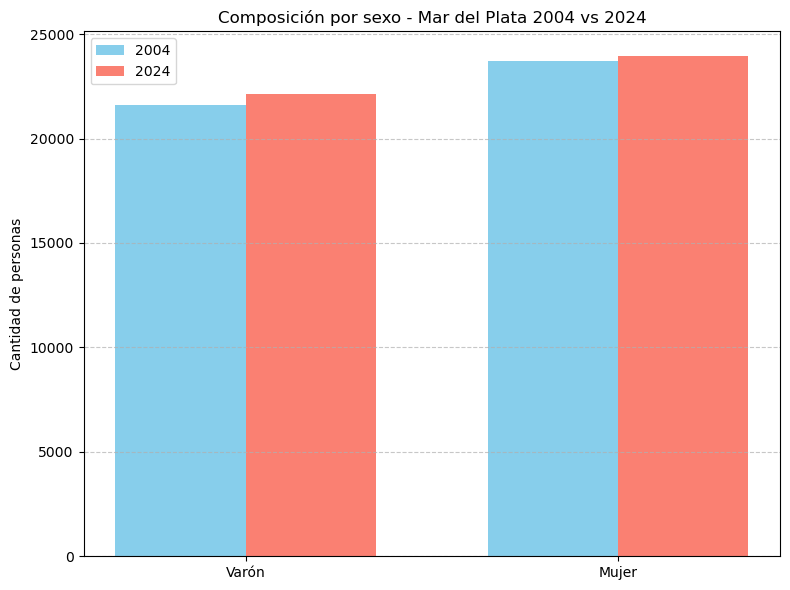

In [129]:
import matplotlib.pyplot as plt

# Datos
sexo = ['Varón', 'Mujer']
valores_2004 = [21592, 23697]
valores_2024 = [22114, 23936]

# Posición de las barras
x = range(len(sexo))
bar_width = 0.35

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.bar([p - bar_width/2 for p in x], valores_2004, width=bar_width, label='2004', color='skyblue')
plt.bar([p + bar_width/2 for p in x], valores_2024, width=bar_width, label='2024', color='salmon')

# Agregar etiquetas y títulos
plt.xticks(x, sexo)
plt.ylabel('Cantidad de personas')
plt.title('Composición por sexo - Mar del Plata 2004 vs 2024')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar
plt.tight_layout()
plt.show()

In [157]:
print(df_2004[['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']].nunique())

ch04           2
ch06          99
ch07           6
ch08           9
nivel_ed       7
estado         5
cat_inac       8
ipcf        2240
dtype: int64


In [161]:
# Verificar los nombres exactos de las columnas
print(df_2004.columns)

Index(['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr',
       'pj1_1', 'pj2_1', 'pj3_1', 'idimpp'],
      dtype='object', length=176)


In [163]:
# Buscar las columnas que contienen 'CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF'
print([col for col in df_2004.columns if 'ch' in col.lower()])

['ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod']


In [185]:
print(df_2024_clean.columns)

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH'],
      dtype='object', length=177)


In [187]:
# Convertir nombres de columnas a minúsculas
df_2024_clean.columns = df_2024_clean.columns.str.lower()

In [189]:
# Ahora procesamos las columnas categóricas
for col in ['ch06', 'ch07', 'ch08', 'nivel_ed', 'cat_inac']:
    df_2004_clean[col] = df_2004_clean[col].astype(str)
    df_2024_clean[col] = df_2024_clean[col].astype(str)

# Convertir variables categóricas a numéricas
le = LabelEncoder()
for col in ['ch06', 'ch07', 'ch08', 'nivel_ed', 'cat_inac']:
    df_2004_clean[col] = le.fit_transform(df_2004_clean[col])
    df_2024_clean[col] = le.fit_transform(df_2024_clean[col])

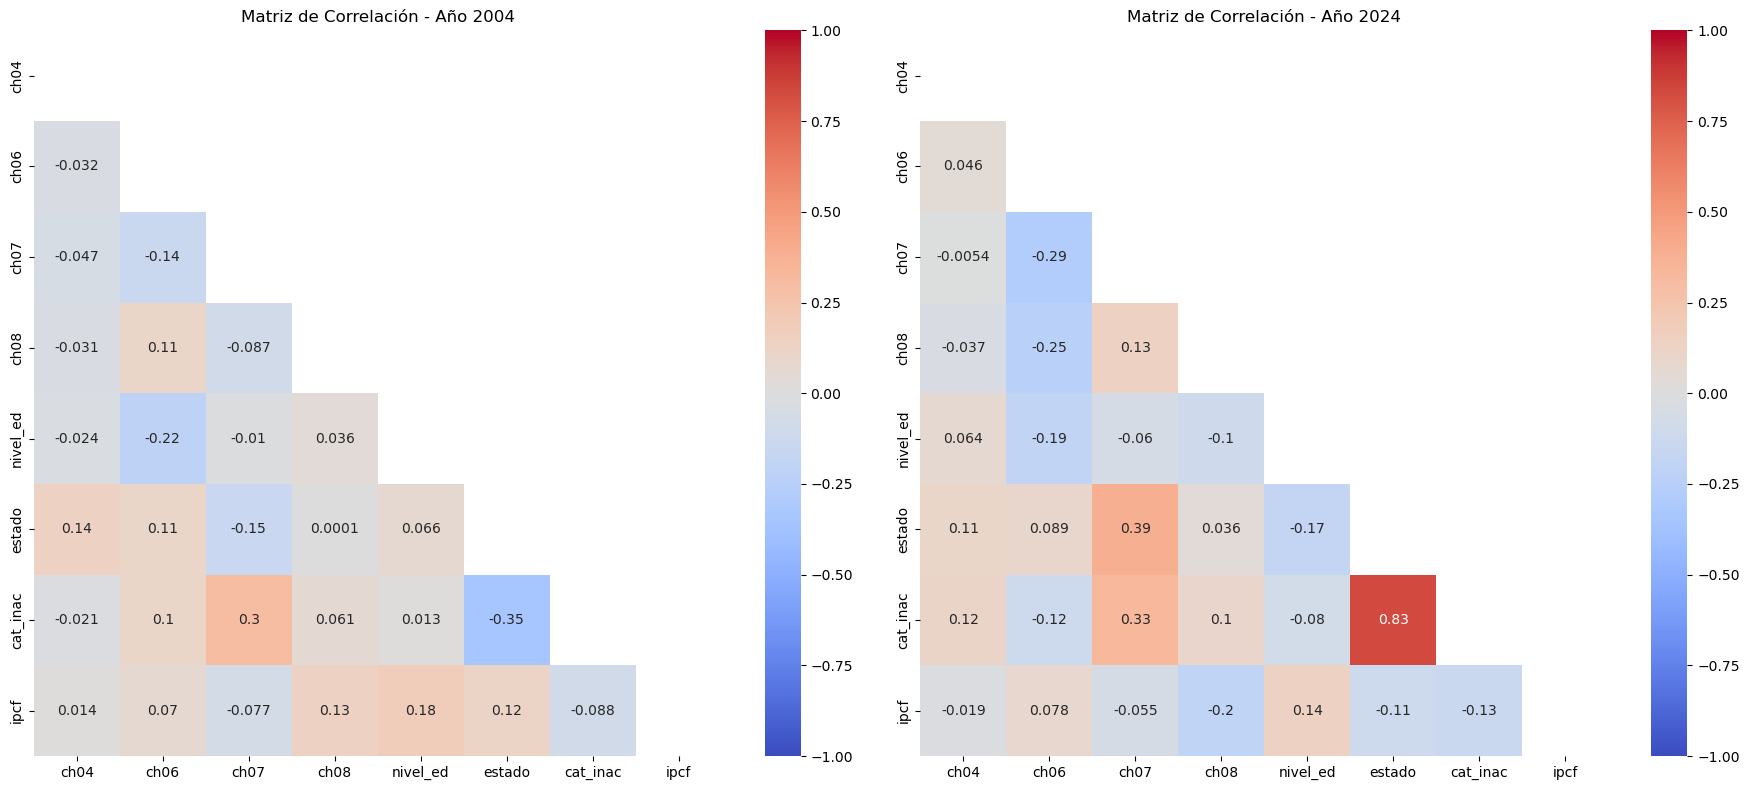

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Cargar los datos
df_2004_clean = pd.read_stata(r'C:\Users\Gustavo\Documents\GitHub\BigDataUBA-Grupo26\TP 2\EPH\Individual_t104.dta')
df_2024_clean = pd.read_excel(r'C:\Users\Gustavo\Documents\GitHub\BigDataUBA-Grupo26\TP 2\EPH\usu_individual_T124.xlsx')

# Unificar nombres de columnas en minúsculas
df_2004_clean.columns = df_2004_clean.columns.str.lower()
df_2024_clean.columns = df_2024_clean.columns.str.lower()

# Columnas que vamos a usar
columnas = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']

# Filtrar las columnas
df_2004_clean = df_2004_clean[columnas].copy()
df_2024_clean = df_2024_clean[columnas].copy()

# Convertir todas las columnas a string (temporalmente para el encoder)
for col in columnas:
    df_2004_clean[col] = df_2004_clean[col].astype(str)
    df_2024_clean[col] = df_2024_clean[col].astype(str)

# Usar LabelEncoder en todas las columnas excepto 'ipcf'
le = LabelEncoder()
for col in columnas:
    if col != 'ipcf':
        df_2004_clean[col] = le.fit_transform(df_2004_clean[col])
        df_2024_clean[col] = le.fit_transform(df_2024_clean[col])

# Asegurar que ipcf sea float
df_2004_clean['ipcf'] = df_2004_clean['ipcf'].astype(float)
df_2024_clean['ipcf'] = df_2024_clean['ipcf'].astype(float)

# Matrices de correlación
corr_2004 = df_2004_clean.corr()
corr_2024 = df_2024_clean.corr()

# Máscara triangular
mask_2004 = np.triu(np.ones_like(corr_2004, dtype=bool))
mask_2024 = np.triu(np.ones_like(corr_2024, dtype=bool))

# Gráficos
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.heatmap(corr_2004, annot=True, cmap='coolwarm', mask=mask_2004, ax=axes[0], vmin=-1, vmax=1)
axes[0].set_title('Matriz de Correlación - Año 2004')

sns.heatmap(corr_2024, annot=True, cmap='coolwarm', mask=mask_2024, ax=axes[1], vmin=-1, vmax=1)
axes[1].set_title('Matriz de Correlación - Año 2024')

plt.tight_layout()
plt.show()